In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def scale_columns(df:pd.DataFrame, column_lst:list)->pd.DataFrame:
  """
  Feature engineering by scaling column values

  Args:
      df (pd.DataFrame): _description_
      lst (list): _description_
      column_name:str

  Returns:
      pd.DataFrame: _description_
  """
  
  for col in column_lst:
    df = df.join(pd.get_dummies(df[col])).drop([col], axis =1)
  
  return df

In [94]:
df = pd.read_csv("customer.csv")

In [95]:
agent_shifts = df["Agent Shift"].unique()
tenure = df["Tenure Bucket"].unique()
managers = df["Manager"].unique()

In [96]:
connected_handling_time = df.groupby("Manager").sum("CSAT Score").sort_values("connected_handling_time")[::-1]

In [97]:
highest_revenue = df.groupby("Manager").sum("CSAT Score").sort_values("Item_price")[::-1]

<Axes: >

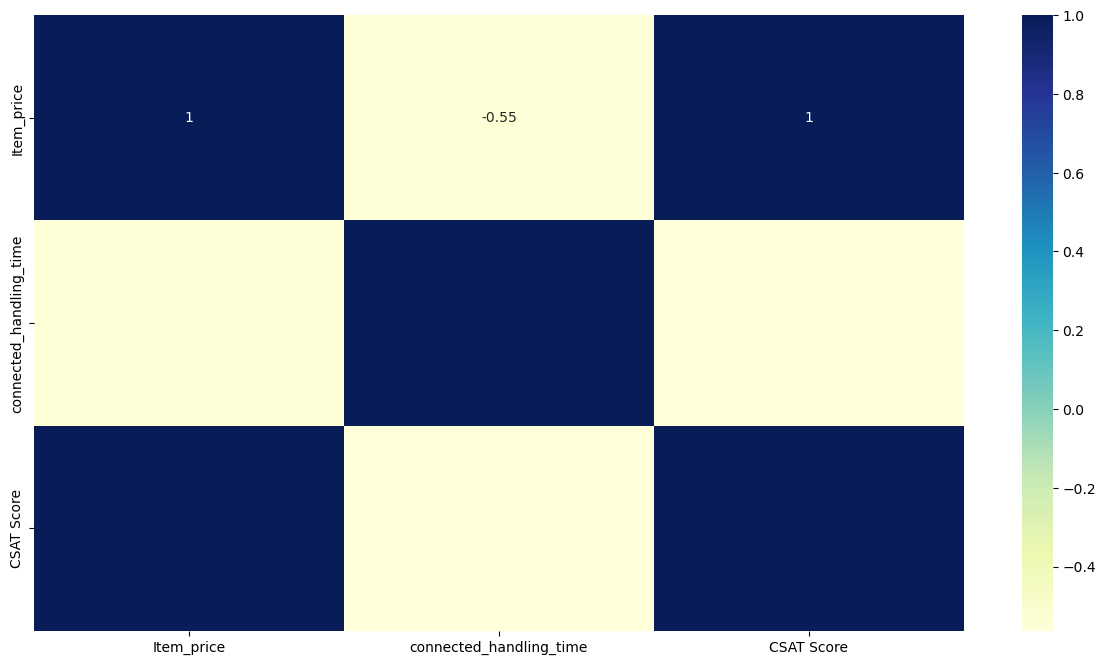

In [98]:
plt.figure(figsize= (15,8))
sns.heatmap(highest_revenue.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Item_price', ylabel='CSAT Score'>

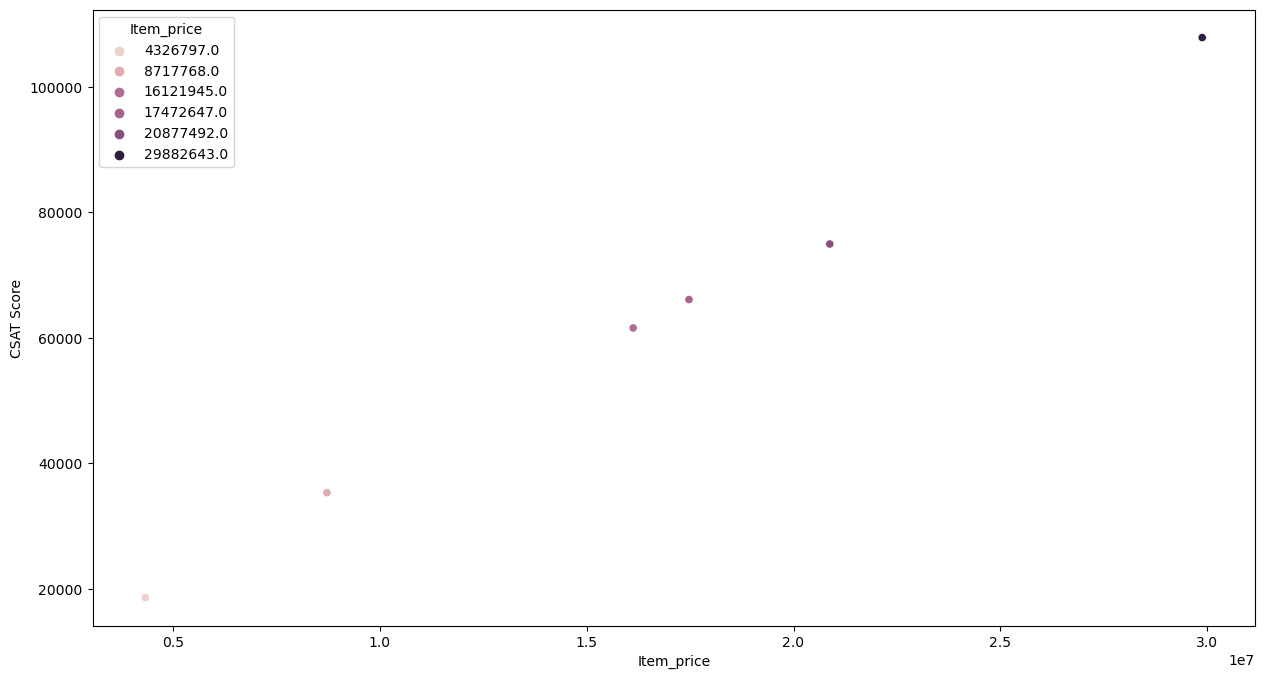

In [99]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Item_price", y ="CSAT Score", data = highest_revenue, hue ="Item_price")

<Axes: xlabel='CSAT Score', ylabel='connected_handling_time'>

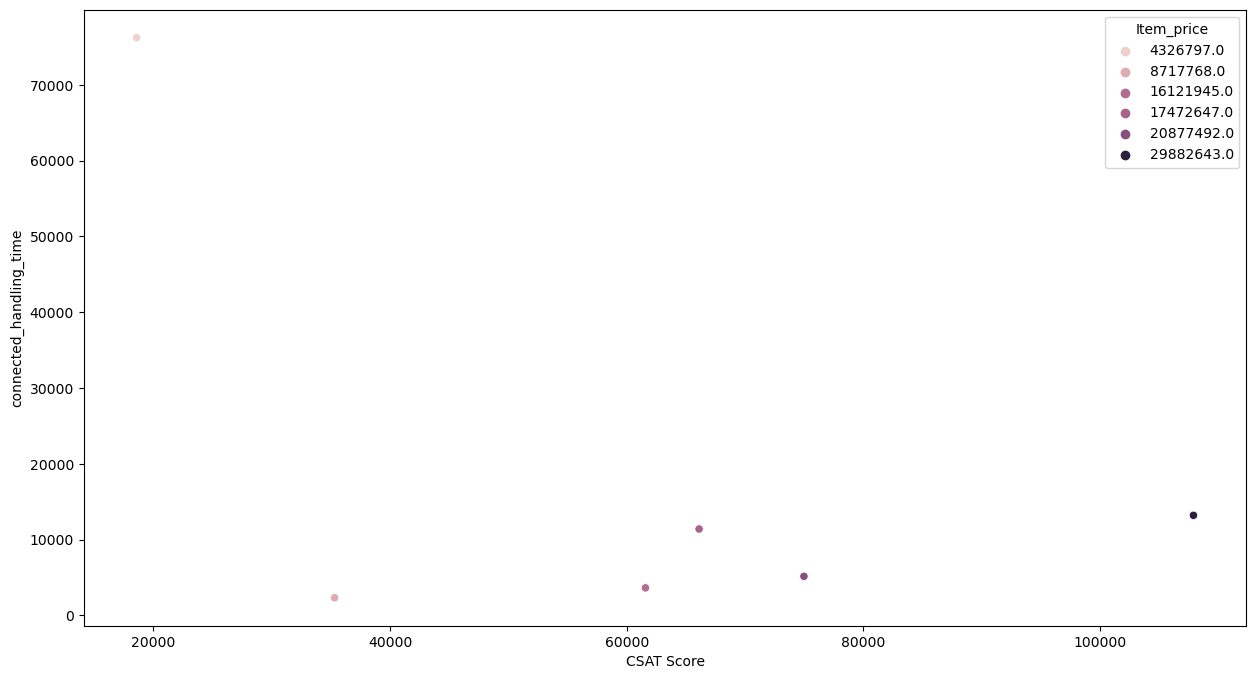

In [100]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="CSAT Score", y ="connected_handling_time", data = highest_revenue, hue ="Item_price")

In [101]:
tenure_dict = {">90":"Senior", "61-90":"Mid-Senior","31-60":"Mid-Junior","0-30":"Junior","On Job Training":"itern"}
for idx in range(len(tenure)):
  df["Tenure Bucket"] = df["Tenure Bucket"].apply(lambda x: tenure_dict[tenure[idx]])


In [102]:
columns_to_keep = ["Manager", "Item_price", "Agent Shift", "Tenure Bucket", "CSAT Score", "connected_handling_time"]
df.drop([col for col in df.columns if col not in columns_to_keep], axis=1, inplace=True)

In [103]:
df

,Item_price,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,NaN,NaN,Jennifer Nguyen,Mid-Senior,Morning,5
1,NaN,NaN,Michael Lee,Mid-Senior,Morning,5
2,NaN,NaN,William Kim,Mid-Senior,Evening,5
3,NaN,NaN,John Smith,Mid-Senior,Evening,5
4,NaN,NaN,Michael Lee,Mid-Senior,Morning,5
...,...,...,...,...,...,...
85902,NaN,NaN,William Kim,Mid-Senior,Morning,4
85903,NaN,NaN,Emily Chen,Mid-Senior,Morning,5
85904,NaN,NaN,Olivia Tan,Mid-Senior,Evening,5
85905,NaN,NaN,Olivia Tan,Mid-Senior,Morning,4
